In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


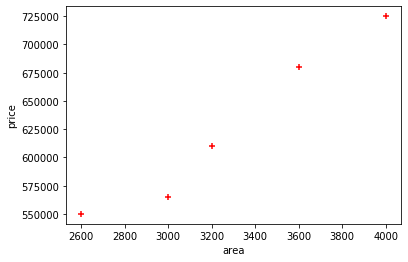

In [3]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color='red', marker='+')

In [4]:
# creating linear regression object
reg = linear_model.LinearRegression(n_jobs=1)

# fitting data which means training the linear reg model using available data points
reg.fit(df[['area']],df[['price']]) # 2nd argument is what is to be predicted

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
reg.predict([[3300]]) # predicting price for area 3300

array([[628715.75342466]])

# price = m * area + b

# y = m * x + b

# m is reg.coef_

# b is reg.intercept_

In [6]:
reg.coef_

array([[135.78767123]])

In [7]:
reg.intercept_

array([180616.43835616])

In [8]:
# y = m * x + b
135.78767123 * 3300 + 180616.43835616 # which is same as reg.predict([[3300]])

628715.75341516

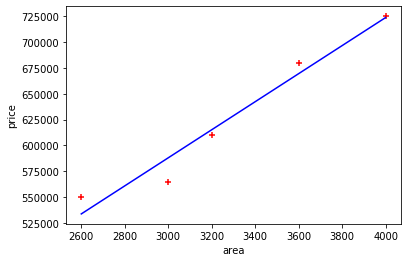

In [9]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')

In [10]:
d = pd.read_csv('areas.csv')
d.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [11]:
p = reg.predict(d)
p

array([[ 316404.10958904],
       [ 384297.94520548],
       [ 492928.08219178],
       [ 661304.79452055],
       [ 740061.64383562],
       [ 799808.21917808],
       [ 926090.75342466],
       [ 650441.78082192],
       [ 825607.87671233],
       [ 492928.08219178],
       [1402705.47945205],
       [1348390.4109589 ],
       [1144708.90410959]])

In [12]:
d['predicted prices'] = p
d

,area,predicted prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [13]:
d.to_csv('pediction.csv', index = False)

# Exercise

In [14]:
cd = pd.read_csv('canada.csv')
cd.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [15]:
reg = linear_model.LinearRegression()

reg.fit(cd[['year']],cd[['per capita income (US$)']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
reg.predict([[2020]])

array([[41288.69409442]])

# Save and load trained model using Joblib

In [18]:
import joblib

In [19]:
joblib.dump(reg, 'model_joblib') # saving the model

['model_joblib']

In [20]:
reg = joblib.load('model_joblib') # loadinf the model

In [21]:
reg.predict([[2020]])

array([[41288.69409442]])